In [1]:
#note book setting

# autocomplete setting 
%config IPCompleter.greedy=True

# print every line of code
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# load lib 

import pandas as pd
import numpy as np
DF = pd.DataFrame
Series = pd.Series
import sys 
import os
os.chdir("""C:\\Users\\demetoir_desktop\\PycharmProjects\\MLtools""")
os.getcwd()


from script.util.PlotTools import PlotTools
from script.util.misc_util import *
'load all'



plot = PlotTools(show=True)



'C:\\Users\\demetoir_desktop\\PycharmProjects\\MLtools'

'load all'

In [3]:
# load data and merge
dataset_path = """C:\\Users\\demetoir_desktop\\PycharmProjects\\MLtools\\data\\winequality"""
merge_path = path_join(dataset_path, 'winequality_merged.csv')
if not os.path.exists(merge_path):
    
    wine_red_path = path_join(dataset_path, 'winequality-red.csv')
    wine_white_path = path_join(dataset_path, 'winequality-white.csv')
    wine_red = pd.read_csv(wine_red_path, sep=';', )
    wine_white = pd.read_csv(wine_white_path, sep=';')
    wine_red['color'] = 'red'
    wine_white['color'] = 'white'

    merge_df = pd.concat([wine_red, wine_white], axis=0)
    # print(merge_df.head())
    # print(merge_df.info())

    merge_path = path_join(dataset_path, 'winequality_merged.csv')
    merge_df.to_csv(merge_path, index=False)
else:
    merge_df = pd.read_csv(merge_path)
# print(merge_df.head())
# print(merge_df.info())



In [4]:
# null checking
merge_df.info()
merge_df.isna().sum()

## null not encluded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

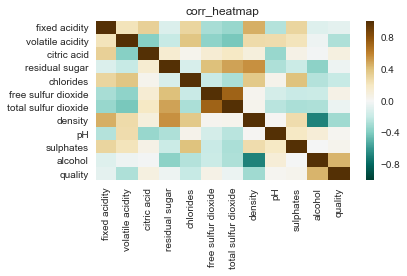

In [5]:
# checking pearson correlation 
corr = merge_df.corr()
plot.heatmap(corr, title='corr_heatmap')
# plot.heatmap





In [6]:
# corr with 'quality' values
"corr with 'quality' values"
corr['quality'].sort_values()

# alchol is the most corelated  and Ph is the least corelated

"corr with 'quality' values"

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

In [7]:
def corr_to_value_tuple(corr):
    values = []

    keys = corr.keys()
    for i in range(len(keys)):
        for j in range(i):
            a, b = keys[i], keys[j]
            if a is not b:
                values += [(corr.loc[b, a], a, b)]

    return values

# colienaer
corr_values = corr_to_value_tuple(corr)
corr_values = sorted(corr_values, key=lambda x: np.abs(x[0]), reverse=True)


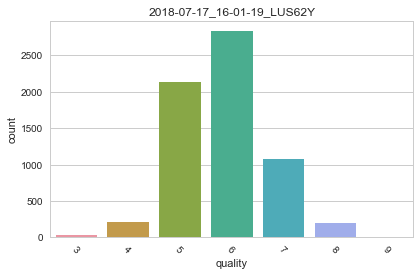

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

In [8]:
# a damn lable distribution is not even uniform
# 5~7 의 중간 품질의 데이터의 양은 많은데 비하여
# 3~4 의 나쁜 품질과 8~9 의 좋은 품질의 데이터의 양이 매우 적다
plot.count(merge_df, 'quality')

# quality 변수를 예측하는데 있어서, 문제 정의를 각 점수를 classfication 으로 볼지 
# regression 볼지 생각 해야한다

# 0,1,2,10점은 존재하지 않고 
# 9점의 경우 전체 6500 여개 의 데이터중 5개 만 존재하므로 outlier로 취급 할수 도 있다

# 데이터 셋의 설명을 보면 0~10점까지의 숫자로 점수를 매겼다고 하였다
merge_df['quality'].value_counts().sort_index()

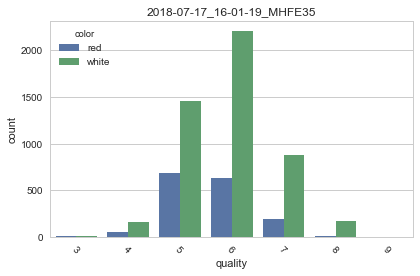

white    4898
red      1599
Name: color, dtype: int64

In [9]:
# color 
plot.count(merge_df, 'quality',  groupby_col='color')
# 전체적으로 백포도주의 점수가 더 높다

merge_df['color'].value_counts()

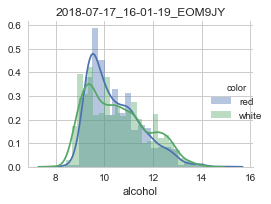

In [10]:
# 'alcohol'
col = 'alcohol'
groupby_col = 'color'
plot.dist_groupby(merge_df, col, groupby_col)

In [11]:
# 알콜은 품질이 5일떄 평균적으로 가장 낮다
# 등등...
plot.violin_plot('quality', 'alcohol', merge_df)

TypeError: string indices must be integers

<Figure size 432x288 with 0 Axes>

In [ ]:
plot.violin_plot('quality', 'chlorides', merge_df)